In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup, Comment
import requests
import time
import sys
import re

import pandas as pd
import numpy as np

In [8]:
# Player IDs from Basketball-Reference for every player who's played at least 40 games from the 2014-15 to 2017-2018 season
player_IDs = ['brookaa01',
'gordoaa01',
'naderab01',
'paynead01',
'horfoal01',
'jeffeal01',
'aminual01',
'anderal01',
'willial03',
'burksal01',
'abrinal01',
'lenal01',
'shvedal01',
'ajincal01',
'crabbal01',
'geeal01',
'stoudam01',
'johnsam01',
'varejan01',
'drumman01',
'iguodan01',
'millean02',
'roberan03',
'bargnan01',
'bogutan01',
'harrian01',
'nichoan01',
'wiggian01',
'bennean01',
'davisan02',
'morroan01',
'tollian01',
'goodwar01',
'baynear01',
'afflaar01',
'riverau01',
'bradlav01',
'adebaba01',
'gordobe01',
'mclembe01',
'simmobe01',
'udrihbe01',
'biyombi01',
'griffbl01',
'marjabo01',
'portibo01',
'bogdabo01',
'bogdabo02',
'diawbo01',
'bealbr01',
'wrighbr03',
'bassbr01',
'ingrabr01',
'jennibr01',
'knighbr03',
'paulbr01',
'rushbr01',
'roberbr01',
'lopezbr01',
'forbebr01',
'hieldbu01',
'milescj01',
'watsocj01',
'mccolcj01',
'payneca01',
'leverca01',
'landrca01',
'boozeca01',
'anthoca01',
'butleca01',
'osmande01',
'parsoch01',
'fryech01',
'villach01',
'budinch01',
'diallch01',
'anderch01',
'boshch01',
'copelch01',
'johnsch04',
'kamanch01',
'paulch01',
'capelca01',
'zelleco01',
'aldrico01',
'breweco01',
'jeffeco01',
'josepco01',
'leeco01',
'feliccr01',
'russeda01',
'augusdj01',
'lillada01',
'rudezda01',
'dotsoda01',
'theisda01',
'gallida01',
'greenda02',
'cunnida01',
'exumda01',
'saricda01',
'milleda01',
'arthuda01',
'collida01',
'leeda02',
'nwabada01',
'westda01',
'bertada01',
'foxde01',
'jordade01',
'liggide01',
'derozde01',
'couside01',
'carrode01',
'murrade01',
'wrighde01',
'schrode01',
'smithde03',
'valende01',
'willide01',
'favorde01',
'rosede01',
'willide02',
'bookede01',
'harride01',
'dedmode01',
'davisde01',
'brookdi01',
'waitedi01',
'nowitdi01',
'sabondo01',
'sloando01',
'motiedo01',
'mitchdo01',
'wrighdo01',
'finnedo01',
'mcderdo01',
'bendedr01',
'greendr01',
'goodedr01',
'bacondw01',
'howardw01',
'poweldw01',
'wadedw01',
'mooreet01',
'davised01',
'udohek01',
'paytoel01',
'millsel01',
'mudiaem01',
'kanteen01',
'bledser01',
'gordoer01',
'moreler01',
'greener01',
'ilyaser01',
'fournev01',
'turneev01',
'ezelife01',
'kaminfr01',
'masonfr01',
'ntilila01',
'vanvlfr01',
'aldemfu01',
'templga01',
'harriga01',
'nealga01',
'hillge01',
'greenge01',
'hendege02',
'antetgi01',
'davisgl01',
'robingl02',
'dragigo01',
'haywago01',
'dienggo01',
'monrogr01',
'smithgr02',
'vasqugr01',
'barneha02',
'whiteha01',
'turkohe01',
'simshe01',
'thompho01',
'clarkia01',
'mahinia01',
'shumpim01',
'canaais01',
'taylois01',
'thomais02',
'whiteis01',
'smithis01',
'zubaciv01',
'bareajo01',
'hicksjj01',
'redicjj01',
'smithjr01',
'sampsja02',
'greenja01',
'mcgeeja01',
'parkeja01',
'crowdja01',
'okafoja01',
'poeltja01',
'crawfja01',
'murraja01',
'nelsoja01',
'anderja01',
'ennisja01',
'hardeja01',
'johnsja01',
'jonesja02',
'mcadoja01',
'cunnija01',
'dudleja01',
'sullija01',
'martija01',
'allenja01',
'jackja01',
'maxieja01',
'smithja02',
'terryja01',
'thompja02',
'evansja01',
'brownja02',
'tatumja01',
'pendeje02',
'greenje02',
'teaguje01',
'witheje01',
'grantje01',
'lambje01',
'linje01',
'grantje02',
'jordaje01',
'bayleje01',
'fredeji01',
'butleji01',
'noahjo01',
'meeksjo01',
'harrijo01',
'inglejo01',
'johnsjo02',
'youngjo01',
'anthojo01',
'embiijo01',
'freeljo01',
'dorsejo01',
'lauvejo01',
'collijo01',
'hensojo01',
'jenkijo01',
'walljo01',
'obryajo01',
'leuerjo01',
'jerebjo01',
'valanjo01',
'simmojo02',
'belljo01',
'clarkjo01',
'hilljo01',
'caldejo01',
'hartjo01',
'huestjo01',
'jacksjo02',
'mcrobjo01',
'richajo01',
'smithjo03',
'holidjr01',
'hernaju01',
'randlju01',
'anderju01',
'hamilju01',
'holidju01',
'jacksju01',
'winslju01',
'nurkiju01',
'mcdankj01',
'townska01',
'leonaka01',
'feldeka01',
'olynyke01',
'oubreke01',
'walkeke02',
'perkike01',
'farieke01',
'bazemke01',
'caldwke01',
'duranke01',
'garneke01',
'loveke01',
'martike02',
'serapke01',
'looneke01',
'birchkh01',
'middlkh01',
'hinriki01',
'thompkl01',
'bryanko01',
'koufoko01',
'papanko01',
'dunnkr01',
'humphkr01',
'porzikr01',
'anderky01',
'korveky01',
'kuzmaky01',
'lowryky01',
'oquinky01',
'singlky01',
'irvinky01',
'aldrila01',
'stephla01',
'thomala01',
'gallola01',
'nancela02',
'markkla01',
'allenla01',
'jamesle01',
'barbole01',
'balllo01',
'amundlo01',
'willilo02',
'mbahalu01',
'noguelu01',
'scolalu01',
'babbilu01',
'kennalu01',
'ridnolu01',
'denglu01',
'brogdma01',
'delanma01',
'beaslma01',
'monkma01',
'ginobma01',
'gasolma01',
'huertma01',
'gortama01',
'belinma01',
'georgma01',
'morrima03',
'smartma01',
'thornma01',
'chalmma01',
'hezonma01',
'brownma02',
'morrima02',
'chrisma01',
'speigma01',
'willima02',
'plumlma01',
'barnema02',
'bonnema01',
'dellama01',
'harklma01',
'klebima01',
'leoname01',
'beaslmi01',
'cartemi01',
'kiddgmi01',
'conlemi01',
'dunlemi02',
'millemi01',
'muscami01',
'scottmi01',
'plumlmi01',
'teodomi01',
'kuzmimi01',
'teletmi01',
'willima01',
'ellismo01',
'harremo01',
'turnemy01',
'robinna01',
'bjeline01',
'hilarne01',
'noelne01',
'calatni01',
'collini01',
'youngni01',
'batumni01',
'brussni01',
'stausni01',
'jokicni01',
'mirotni01',
'vucevni01',
'vonleno01',
'powelno01',
'coleno01',
'mayooj01',
'anunoog01',
'asikom01',
'casspom01',
'porteot01',
'hairspj02',
'tuckepj01',
'prigipa01',
'siakapa01',
'connapa01',
'beverpa01',
'mccawpa01',
'pattepa01',
'millspa02',
'gasolpa01',
'georgpa01',
'millspa01',
'piercpa01',
'zipsepa01',
'anticpe01',
'jonespe01',
'pressph01',
'acyqu01',
'acyqu01',
'pondequ01',
'rondora01',
'sessira01',
'foyera01',
'vaughra01',
'butlera01',
'netora01',
'mccalra01',
'feltora01',
'bullore01',
'evansre01',
'jacksre01',
'jefferi01',
'holmeri01',
'rubiori01',
'hummero01',
'covinro01',
'sacrero01',
'lopezro01',
'hoodro01',
'mcgruro01',
'stuckro01',
'bakerro01',
'holliro01',
'pricero01',
'hibbero01',
'onealro01',
'gayru01',
'goberru01',
'westbru01',
'anderry01',
'holliry01',
'kellyry01',
'mejrisa01',
'dekkesa01',
'vujacsa01',
'kilpase01',
'chrisse01',
'ojelese01',
'ibakase01',
'rodrise01',
'curryse01',
'muhamsh01',
'napiesh01',
'larkish01',
'livinsh01',
'mariosh01',
'willish03',
'macksh01',
'thornsi01',
'labissk01',
'hillso01',
'weemsso01',
'dinwisp01',
'hawessp01',
'johnsst04',
'curryst01',
'brownst02',
'blakest01',
'adamsst01',
'leaftj01',
'mccontj01',
'warretj01',
'gibsota01',
'blackta01',
'princta02',
'princta01',
'fergute01',
'joneste01',
'rosste01',
'roziete01',
'sefolth01',
'youngth01',
'robinth01',
'makerth01',
'splitti01',
'duncati01',
'fraziti01',
'hardati02',
'mozgoti01',
'luwawti01',
'harrito02',
'satorto01',
'douglto01',
'allento01',
'parketo01',
'snellto01',
'weartr01',
'grahatr01',
'arizatr01',
'booketr01',
'burketr01',
'lylestr01',
'thomptr01',
'danietr01',
'lawsoty01',
'dorsety01',
'ennisty01',
'hansbty01',
'johnsty01',
'ulisty01',
'zellety01',
'evansty01',
'chandty01',
'jonesty01',
'hasleud01',
'oladivi01',
'cartevi01',
'ellinwa01',
'iwundwe01',
'johnswe01',
'matthwe02',
'bartowi01',
'caulewi01',
'greenwi01',
'reedwi02',
'hernawi01',
'chandwi01',
'ferreyo01',
'colliza01',
'lavinza01',
'randoza01',
'pachuza01']

# Part 1: Data Scraping

In [9]:
# Getting Columns Labels for Per_100
# Basketball-Reference Player Base URL
url_template = "https://www.basketball-reference.com/players/"
letter = player_IDs[0][0] + '/'
name = player_IDs[0] + '.html'

url = url_template + letter + name

# Get HTML of the url
html = requests.get(url).content

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html, 'lxml')

# empty data frame to add data too
per_100df = pd.DataFrame(columns=range(32), index=range(535))

headers_array = []

# found all table data saved in comments in the html
for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

# turning all of that table data into html readable text via BeautifulSoup
            data = BeautifulSoup(comment,"lxml")
    # selecting the table
            for items in data.findAll('table',{'class':'row_summable'}):
            # selecting per100 table
              if (items.get('id') == 'per_poss' ):
                    # finding column labels
                        headers = items.findAll('th', {'class': 'poptip'})
                        # appending lables to headers_array
                        for row in headers:
                            temp = row.text
                            headers_array.append(temp)
                
                            
# Setting column names of per100 dataframe                        
per_100df.columns = headers_array
print(per_100df)


    Season  Age   Tm   Lg  Pos    G   GS   MP   FG  FGA ...   TRB  AST  STL  \
0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
5      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
7      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
8      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
9      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
10     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

In [6]:
# Getting Columns Labels for Advanced
# Basketball-Reference Player Base URL
url_template = "https://www.basketball-reference.com/players/"
letter = player_IDs[0][0] + '/'
name = player_IDs[0] + '.html'

url = url_template + letter + name

# Get HTML of the url
html = requests.get(url).content

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html, 'lxml')

# empty data frame to add data too
advanced_df = pd.DataFrame(columns=range(29), index=range(535))
headers_array = []

# found all table data saved in comments in the html
for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

# turning all of that table data into html readable text via BeautifulSoup
            data = BeautifulSoup(comment,"lxml")
    # selecting the table
            for items in data.findAll('table',{'class':'row_summable'}):
            # selecting per100 table
              if (items.get('id') == 'advanced' ):
                    # finding column labels
                        headers = items.findAll('th', {'class': 'poptip'})
                        # appending lables to headers_array
                        for row in headers:
                            temp = row.text
                            headers_array.append(temp)
                
                            
# Setting column names of per100 dataframe                        
advanced_df.columns = headers_array
print(advanced_df)


    Season  Age   Tm   Lg  Pos    G   MP  PER  TS% 3PAr ...        OWS  DWS  \
0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
5      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
7      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
8      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
9      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
10     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN   
11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

In [8]:
# Getting Columns Labels for Shooting
# Basketball-Reference Player Base URL
url_template = "https://www.basketball-reference.com/players/"
letter = player_IDs[0][0] + '/'
name = player_IDs[0] + '.html'

url = url_template + letter + name

# Get HTML of the url
html = requests.get(url).content

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html, 'lxml')

# empty data frame to add data too
shooting_df = pd.DataFrame(columns=range(29), index=range(535))
headers_array = []

# found all table data saved in comments in the html
for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

# turning all of that table data into html readable text via BeautifulSoup
            data = BeautifulSoup(comment,"lxml")
    # selecting the table
            for items in data.findAll('table',{'class':'row_summable'}):
            # selecting per100 table
              if (items.get('id') == 'shooting' ):
                    # finding column labels
                        headers = items.findAll('th', {'class': 'poptip'})
                        # appending lables to headers_array
                        for row in headers:
                            temp = row.text
                            headers_array.append(temp)
                
                            
# Setting column names of shooting dataframe                        
shooting_df.columns = headers_array
print(shooting_df)


    Season  Age   Tm   Lg  Pos    G   MP  FG% Dist.   2P ...  16 <3   3P  \
0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
5      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
7      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
8      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
9      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
10     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN ...    NaN  NaN   
12     NaN  

In [10]:
#Getting data of Per100 career totals into an array and inserting them into the designated dataframe

i = 0
while( i < len(player_IDs)-1):
    #Basketball-Reference Player Base URL
    url_template = "https://www.basketball-reference.com/players/"
    letter = player_IDs[i][0] + '/'
    name = player_IDs[i] + '.html'

    url = url_template + letter + name

    # Get HTML of the url
    html = requests.get(url).content


    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'lxml')

    # empty list to add data too
    index_array = []   

    # found all table data saved in comments in the html
    for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

    # turning all of that table data into html readable text via BeautifulSoup
                data = BeautifulSoup(comment,"lxml")
        # selecting the Career Data // Update 11/20/18: The html of the website has changed a bit from when I wrote this. It may need to be adjusted a bit. Original data from this, is labeled in an excel file
                for items in data.findAll('table',{'class':'row_summable'}):
                # selecting per100 table
                      if (items.get('id') == 'per_poss' ):
                        # finding data
                            entries = items.find('tbody')
                            entries1 = entries.findAll('tr', limit =1)
                            for row in entries1:
                                #print(row.text)
                                for y in row.findAll('th'):
                                    index_array.append(y.text)
                                for x in row.findAll('td'):
                                    index_array.append(x.text)
                           
                                #print(index_array)
    per_100df.iloc[i] = (index_array)
    i = i+1
    
print(per_100df.head())

    Season Age   Tm   Lg Pos   G  GS    MP   FG   FGA ...    TRB  AST  STL  \
0  2007-08  23  HOU  NBA  PG  51   0   608  8.1  19.7 ...    4.9  7.6  1.1   
1  2014-15  19  ORL  NBA  PF  47   8   797  6.0  13.3 ...   10.8  2.1  1.3   
2  2017-18  24  BOS  NBA  SF  48   1   522  4.8  14.3 ...    6.8  2.5  1.4   
3  2014-15  23  TOT  NBA  PF  32  22   739  6.3  15.1 ...   11.1  2.1  1.3   
4  2007-08  21  ATL  NBA   C  81  77  2540  6.9  13.9 ...   16.3  2.6  1.2   

   BLK  TOV   PF   PTS   ORtg DRtg  
0  0.4  3.8  6.0  23.1    107  106  
1  1.4  2.4  5.3  15.6    101  107  
2  1.0  3.3  4.3  14.0     83  105  
3  0.6  3.0  6.1  14.7     88  112  
4  1.6  2.8  5.5  17.0    108  106  

[5 rows x 32 columns]


In [11]:
per_100df.to_excel('GETPOSITIONS.xlsx',sheet_name='Sheet1')


In [10]:
#Getting data of Advanced career totals into an array and inserting them into the designated dataframe
i = 0
while( i < len(player_IDs)-1):
    #Basketball-Reference Player Base URL
    url_template = "https://www.basketball-reference.com/players/"
    letter = player_IDs[i][0] + '/'
    name = player_IDs[i] + '.html'

    url = url_template + letter + name

    # Get HTML of the url
    html = requests.get(url).content


    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'lxml')

    # empty list to add data too
    index_array = []   

    # found all table data saved in comments in the html
    for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

    # turning all of that table data into html readable text via BeautifulSoup
                data = BeautifulSoup(comment,"lxml")
        # selecting the Career Data
                for items in data.findAll('table',{'class':'row_summable'}):
                # selecting advanced table
                      if (items.get('id') == 'advanced' ):
                        # finding data
                            entries = items.find('tfoot')
                            entries1 = entries.findAll('tr', limit =1)
                            for row in entries1:
                                #print(row.text)
                                for y in row.findAll('th'):
                                    index_array.append(y.text)
                                for x in row.findAll('td'):
                                    index_array.append(x.text)
                           
                                #print(index_array)
    advanced_df.iloc[i] = (index_array)
    i = i+1
    
print(advanced_df.head())

   Season Age Tm   Lg Pos    G     MP   PER   TS%  3PAr  ...      OWS   DWS  \
0  Career         NBA      645  13439  13.3  .525  .405  ...     10.6   8.7   
1  Career         NBA      263   6867  15.4  .532  .317  ...      6.4   6.6   
2  Career         NBA       48    522   5.1  .439  .436  ...     -0.9   0.8   
3  Career         NBA      107   1403   8.0  .455  .138  ...     -1.4   0.8   
4  Career         NBA      718  23812  18.8  .569  .096  ...     43.7  34.6   

     WS   WS/48    OBPM  DBPM   BPM  VORP  
0  19.2    .069     0.7  -2.4  -1.8   0.8  
1  13.0    .091    -0.2   0.2  -0.1   3.3  
2  -0.1  -0.014    -5.9   0.3  -5.6  -0.5  
3  -0.6  -0.019    -4.7  -0.8  -5.5  -1.2  
4  78.3    .158     0.8   2.3   3.1  30.7  

[5 rows x 29 columns]


In [ ]:
#Getting data Shooting career totals into an array and inserting them into the designated dataframe
i = 0
while( i < len(player_IDs)-1):
    #Basketball-Reference Player Base URL
    url_template = "https://www.basketball-reference.com/players/"
    letter = player_IDs[i][0] + '/'
    name = player_IDs[i] + '.html'

    url = url_template + letter + name

    # Get HTML of the url
    html = requests.get(url).content


    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(html, 'lxml')

    # empty list to add data too
    index_array = []   

    # found all table data saved in comments in the html
    for comment in soup.find_all(string= lambda text:isinstance(text,Comment)): 

    # turning all of that table data into html readable text via BeautifulSoup
                data = BeautifulSoup(comment,"lxml")
        # selecting the Career Data
                for items in data.findAll('table',{'class':'row_summable'}):
                # selecting shooting table
                      if (items.get('id') == 'shooting' ):
                        # finding data
                            entries = items.find('tfoot')
                            entries1 = entries.findAll('tr', limit =1)
                            for row in entries1:
                                #print(row.text)
                                for y in row.findAll('th'):
                                    index_array.append(y.text)
                                for x in row.findAll('td'):
                                    index_array.append(x.text)
                           
                                #print(index_array)
    shooting_df.iloc[i] = (index_array)
    i = i+1
    
print(shooting_df.head())

In [ ]:
# Export 3 Dataframes to be combined quickly and have column names edited
per_100df.to_excel('Per100.xlsx',sheet_name='Sheet1')
advanced_df.to_excel('Advanced.xlsx',sheet_name='Sheet1')
shooting_df.to_excel('Shooting.xlsx',sheet_name='Sheet1')

In [2]:
df = pd.read_excel('NBA_data-revised.xlsx')
df.fillna(0, inplace=True) # there were a couple of cells that were blank when they should've contained 0's
df.head()

POSITION  CLUSTER   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
Aaron Brooks          1        7  13.3  0.525  0.405  0.200   2.1   6.8   4.5   
Aaron Gordon          4        5  15.4  0.532  0.317  0.277   6.4  18.5  12.4   
Abdel Nader           3        6   5.1  0.439  0.436  0.262   2.8  12.0   7.4   
Adreian Payne         4        1   8.0  0.455  0.138  0.226   6.4  19.6  12.9   
Al Horford            5        1  18.8  0.569  0.096  0.211   7.7  21.8  14.8   

               AST%     ...      fg%_3P  2pt_%Ast'd  dunk_%FGA  3pt_%Ast'd  \
Aaron Brooks   23.6     ...       0.370       0.165      0.001       0.666   
Aaron Gordon   10.3     ...       0.309       0.501      0.121       0.866   
Abdel Nader     7.1     ...       0.354       0.333      0.034       0.957   
Adreian Payne   7.3     ...       0.254       0.629      0.082       0.933   
Al Horford     15.9     ...       0.370       0.701      0.087       0.966   

               %3PA_corner  3P%_corner  per100_FG%  per100_3P%  per100_2P%  \
Aaron Brooks         0.141       0.415       0.413       0.370       0.442   
Aaron Gordon         0.270       0.319       0.451       0.309       0.517   
Abdel Nader          0.354       0.348       0.336       0.354       0.321   
Adreian Payne        0.203       0.250       0.406       0.254       0.430   
Al Horford           0.226       0.382       0.525       0.370       0.541   

               per100_FT%  
Aaron Brooks        0.837  
Aaron Gordon        0.698  
Abdel Nader         0.590  
Adreian Payne       0.680  
Al Horford          0.750  

[5 rows x 58 columns]

# Part 2: Data Visualization / Dimension Reduction

In [9]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Pairplot

# Commenting out to reduce file size
#sns_plot = sns.pairplot(df)

#sns_plot.savefig("Pairplot.png")

In [26]:
# ATTEMPT1 TO REDUCE DIMENSIONS
# use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_data = scaler.transform(df)

In [229]:
# want to see how much variance in the data can be explained in just two components
i = 1
while (i < 6):
    pca = PCA (n_components=i)
    pca.fit(scaled_data)
    print(pca.explained_variance_ratio_)
    i = i+1
#print(pca.mean_)

[0.35356892]
[0.35356892 0.18442001]
[0.35356892 0.18442001 0.08842957]
[0.35356892 0.18442001 0.08842957 0.06129435]
[0.35356892 0.18442001 0.08842957 0.06129435 0.04057608]


###### Not a lot of variance between the points can be accounted for when using principal component analysis. Ideally, 3 or less components to describe most of the variance between the data would be preferable as it would allow one to visualize the data. In this case the first two components only explain 53.80% of the variance which isn't very good. As you increase the number of principal components the amount variance each component accounts for shrinks.

In [25]:
#ATTEMPT 2 TO REDUCE DIMENSIONS

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [27]:
X = df[['POSITION', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'VORP',
       'per100_FG', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_2P',
       'per100_2PA', 'per100_FT', 'per100_FTA', 'per100_ORB', 'per100_DRB',
       'per100_TRB', 'per100_AST', 'per100_STL', 'per100_BLK', 'per100_TOV',
       'per100_PF', 'per100_PTS', 'FG%', 'avg_Dist.', '%fg_2P', '%fg_0-3',
       '%fg_3-10', '%fg_10-16', '%fg_16 <3', 'fg%_2P', 'fg%_0-3', 'fg%_3-10',
       'fg%_10-16', 'fg%_16 <3', 'fg%_3P', "2pt_%Ast'd", "dunk_%FGA",
       "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_FG%', 'per100_3P%',
       'per100_2P%', 'per100_FT%']]
y = df['POSITION']
df.columns.nunique()

58

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


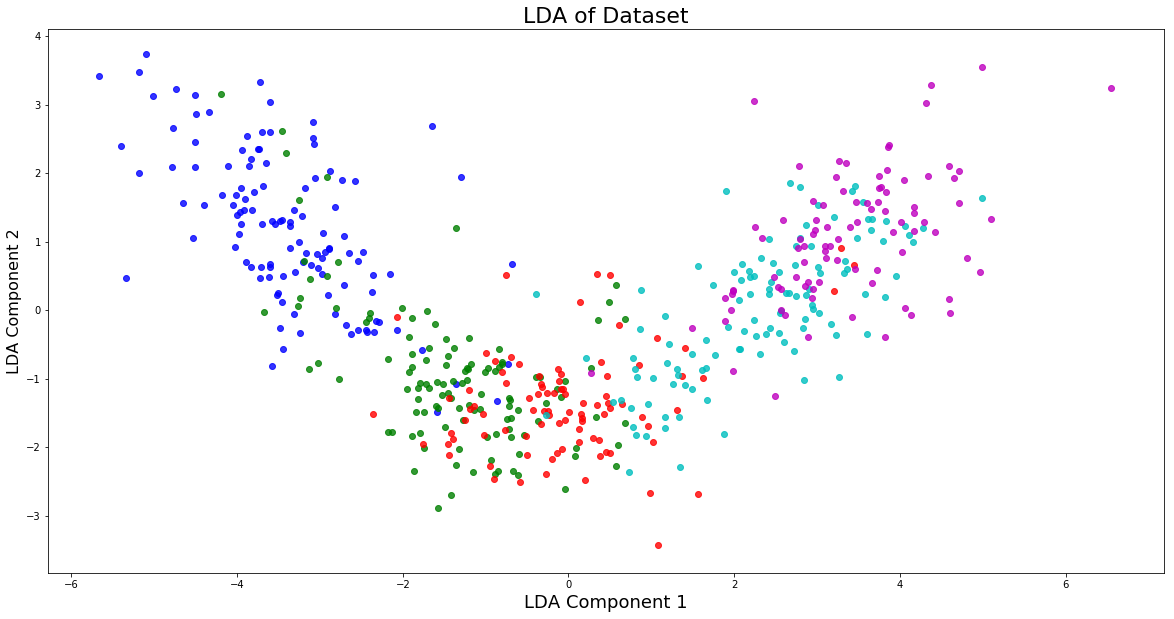

In [34]:
lda = LDA(n_components=2, solver='svd')
lda1 = lda.fit(X, y).transform(X)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize = (20,10))
for color, i, position in zip(colors, [1, 2, 3, 4, 5], y):
    plt.scatter(lda1[y == i, 0], lda1[y == i, 1], alpha=.8, color=color,
                label=y)
plt.title('LDA of Dataset', fontsize = 22)
#plt.legend()
plt.xlabel('LDA Component 1', fontsize=18)
plt.ylabel('LDA Component 2', fontsize=16)
plt.savefig('LDA2Components.png')
plt.show()

In [36]:
print (lda.explained_variance_ratio_.sum())

0.9473272016550255


In [46]:
print(lda.intercept_) # These are how the predictors are weighted for each class

[ -32.11991621   84.07947736  484.71781997 -225.18134482 -301.87269983]


###### LDA is able to explain 94.73% of the variance in the data using only two components. LDA maximizes the between class matrix while minimizing the within class matrix. What this means is that LDA found linear combinations of the predictors such that for each position players could be classified as (In the graph above: Blue = 1, Green = 2, Red = 3, Blue = 4, Purple = 5) could be easily distinguished from other positions while minimizing the scatter of the data within the group. Why is this important? Reducing dimensions ususally means having fewer possibilities of predictors that have low variance. 
##### Think of a scenario where we have a constant variable (all observations have same value, 5 lets say, for one predictor) in our data set. Do you think, it can improve the power of model? Of course not, because it has ZERO variance. In case of high number of dimensions, we should drop variables having low variance compared to others because these variables will not explain the variation in target variables. Hence why you check the explained variance ratio, which is the a measure of how much variance is explained by each individual component. 

# Part 3: Clustering

In [9]:
from sklearn.cluster import KMeans

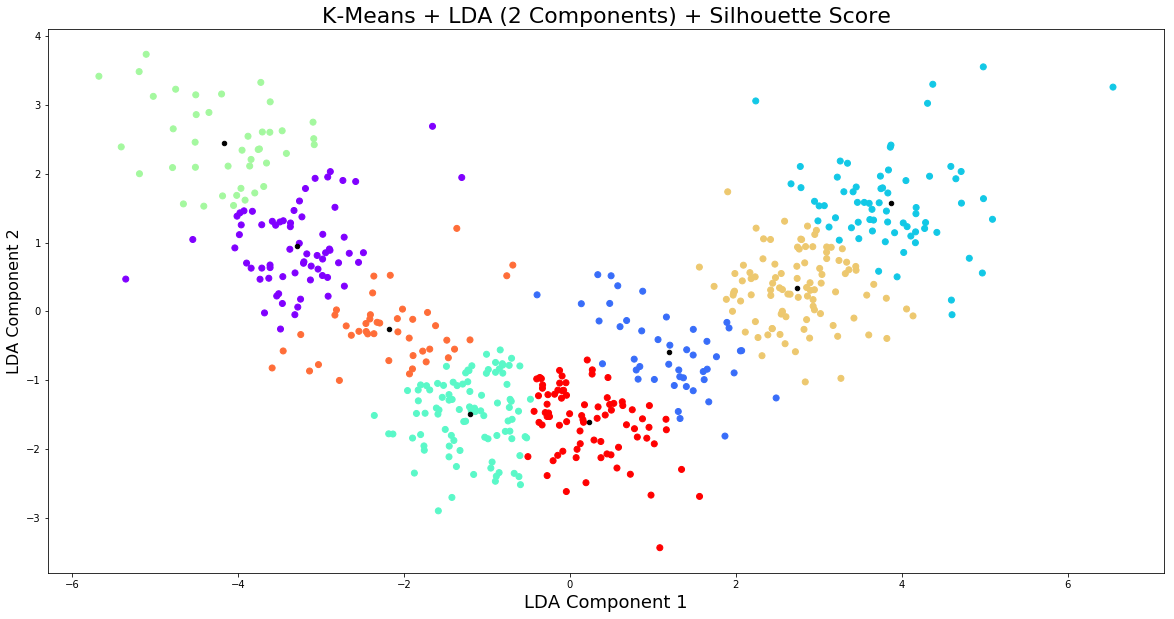

In [31]:
kmeans = KMeans(n_clusters=8).fit(lda1)
y_kmeans = kmeans.predict(lda1)
plt.figure(figsize = (20,10))
plt.title('K-Means + LDA (2 Components) + Silhouette Score', fontsize = 22)
plt.xlabel('LDA Component 1', fontsize=18)
plt.ylabel('LDA Component 2', fontsize=16)
plt.scatter(lda1[:, 0], lda1[:, 1], c= y_kmeans, cmap = 'rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 20)
plt.savefig('KMeansLDASilhouetteScore.png')
plt.show()

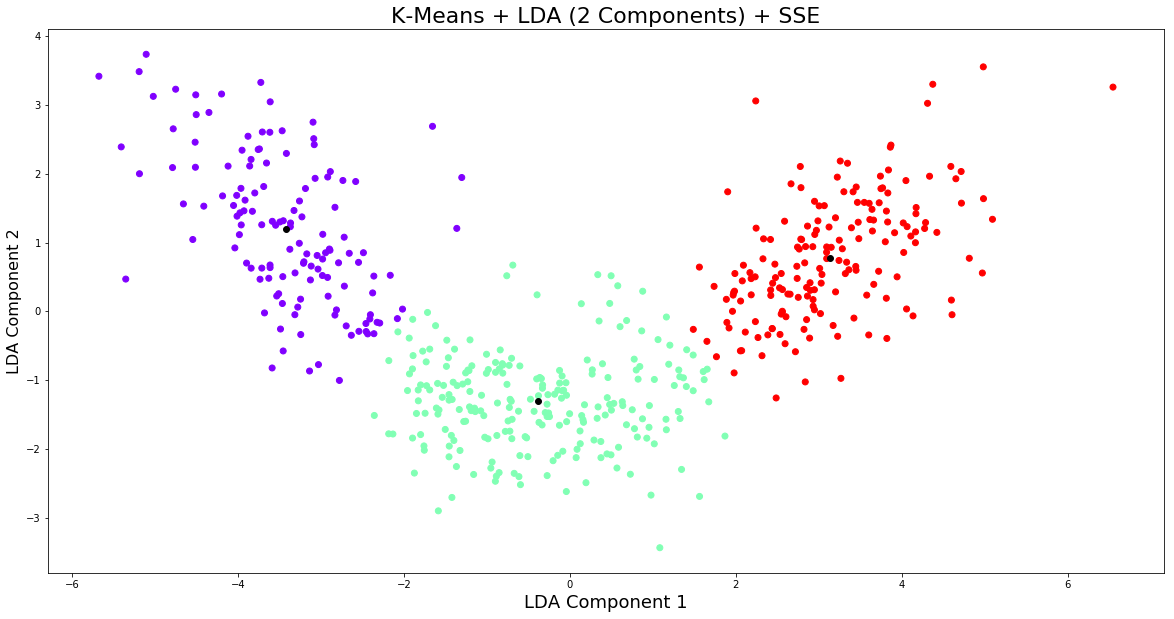

In [33]:
kmeans = KMeans(n_clusters=3).fit(lda1)
y_kmeans = kmeans.predict(lda1)
plt.figure(figsize = (20,10))
plt.title('K-Means + LDA (2 Components) + SSE', fontsize = 22)
plt.xlabel('LDA Component 1', fontsize=18)
plt.ylabel('LDA Component 2', fontsize=16)
plt.scatter(lda1[:, 0], lda1[:, 1], c= y_kmeans, cmap = 'rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 35)
plt.savefig('KMeansLDASSE.png')
plt.show()

In [38]:
kmeans.labels_

array([7, 5, 6, 1, 1, 1, 0, 6, 4, 6, 6, 4, 3, 4, 6, 0, 1, 1, 1, 1, 6, 7,
       0, 5, 4, 2, 5, 6, 5, 1, 6, 5, 6, 4, 6, 3, 6, 4, 3, 0, 2, 2, 4, 5,
       4, 1, 3, 0, 5, 3, 1, 1, 6, 7, 2, 0, 6, 7, 1, 0, 6, 6, 3, 3, 7, 3,
       1, 1, 5, 6, 0, 0, 5, 1, 0, 4, 4, 1, 0, 6, 1, 7, 4, 1, 4, 6, 1, 3,
       6, 1, 2, 7, 2, 0, 0, 4, 0, 6, 5, 3, 5, 0, 1, 2, 1, 0, 1, 5, 2, 4,
       6, 6, 1, 0, 3, 2, 7, 7, 6, 7, 1, 2, 0, 3, 2, 4, 4, 0, 3, 5, 1, 2,
       1, 3, 0, 0, 0, 0, 5, 1, 6, 1, 1, 2, 3, 4, 1, 7, 6, 2, 4, 2, 3, 4,
       3, 1, 6, 6, 4, 0, 7, 3, 2, 1, 6, 6, 6, 3, 0, 6, 5, 1, 6, 2, 6, 1,
       1, 4, 7, 0, 4, 6, 1, 0, 6, 1, 3, 3, 2, 2, 2, 7, 4, 7, 1, 6, 6, 0,
       1, 4, 5, 0, 5, 1, 2, 3, 7, 0, 5, 2, 6, 0, 1, 6, 0, 4, 1, 4, 2, 1,
       1, 3, 1, 2, 0, 0, 4, 0, 7, 4, 5, 6, 2, 2, 4, 2, 2, 6, 4, 6, 0, 6,
       3, 2, 1, 4, 4, 4, 1, 4, 4, 6, 7, 1, 1, 5, 4, 6, 4, 3, 4, 7, 0, 5,
       0, 5, 6, 5, 7, 0, 1, 5, 1, 6, 0, 0, 4, 5, 4, 6, 2, 5, 0, 2, 1, 1,
       6, 6, 0, 0, 1, 6, 4, 4, 4, 6, 2, 6, 6, 4, 0,

In [36]:
# Just checked to see if I implemented the clustering algorithm correctly above
# Now I need to determine the optimal number of clusters

In [37]:
# METHOD 1: Elbow Method
# The elbow method is a method of interpretation
# designed to help finding the appropriate number of clusters in a dataset.
# Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
# if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. 

In [30]:
cluster_range = range(1,12)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters = num_clusters)
    clusters.fit(lda1scaled)
    cluster_errors.append(clusters.inertia_)
    
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [22]:
clusters_df[0:11]

num_clusters  cluster_errors
0              1     4849.282761
1              2     2042.274959
2              3      849.710463
3              4      644.352366
4              5      521.799189
5              6      408.305286
6              7      361.385861
7              8      329.325219
8              9      303.994930
9             10      276.893185
10            11      257.003853

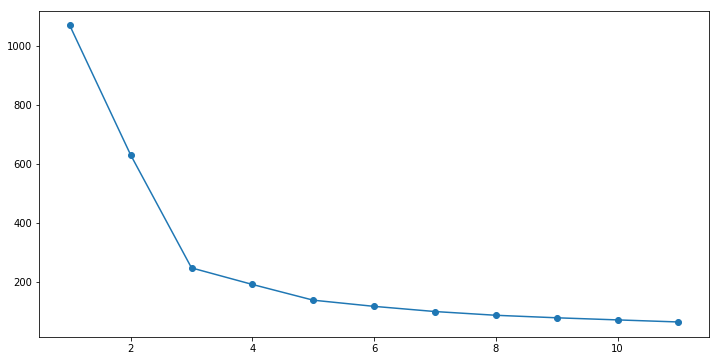

In [31]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [16]:
# Via the elbow method, the optimal number of clusters would be 3 as that is where the elbow occurs.
# This cannot be the number of clusters I am looking for as basketball has 5 positions and my hypothesis is that there are more specific positions players can play so that entails there being more than 5 clusters.
# Need to find a new way to find the optimal number of clusters

In [17]:
# METHOD 2: Silhouette Score

# The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
# Score closer to 1 means assigned to the cluster correctly and score closer to -1 is assigned to a wrong cluster. A score close to 0 means the point lies between almost at the boundary of both the clusters.

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    
    #Initialize the clusterer with n_clusters calue and a random generator seed of 10 for reproducibility
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(lda1)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(lda1, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette score is: ", silhouette_avg)    

For n_clusters = 2 The average silhouette score is:  0.510806583305658
For n_clusters = 3 The average silhouette score is:  0.5695930109186869
For n_clusters = 4 The average silhouette score is:  0.47975171447047277
For n_clusters = 5 The average silhouette score is:  0.429086008371155
For n_clusters = 6 The average silhouette score is:  0.40885083949259565
For n_clusters = 7 The average silhouette score is:  0.38409428741084206
For n_clusters = 8 The average silhouette score is:  0.3585685698154278
For n_clusters = 9 The average silhouette score is:  0.3561331805937342
For n_clusters = 10 The average silhouette score is:  0.33803788127143725
For n_clusters = 11 The average silhouette score is:  0.341160303386596
For n_clusters = 12 The average silhouette score is:  0.3343331669636989
For n_clusters = 13 The average silhouette score is:  0.3498997237430676
For n_clusters = 14 The average silhouette score is:  0.3398575682989587
For n_clusters = 15 The average silhouette score is:  0.34

In [36]:
# These are the results from the silhouette score method. 
# To interpret the results I need to remember what the goal of my project is. 
# 1. I want to define as many roles players can play in the modern day game of basketball
# Therefore, I want to have as maximize the number of clusters I have
# thus I need to find a value for n_clusters where the silhouette score is
# no longer decreasing and stablizes around a certain point no matter how many additional clusters are added
# That point taking into account the average silhouette score is 8 clusters
# 8 clusters is the point where the number of clusters is maximized and the silhouette score is no longer decreasing


# Part 4: Exploring Cluster Groups

In [214]:
# Investigate Clusters
mask = (df['CLUSTER']==2)
print(mask)

Aaron Brooks                False
Aaron Gordon                False
Abdel Nader                 False
Adreian Payne               False
Al Horford                  False
Al Jefferson                False
Al-Farouq Aminu             False
Alan Anderson               False
Alan Williams               False
Alec Burks                  False
Alex Abrines                False
Alex Len                    False
Alexey Shved                False
Alexis Ajinca               False
Allen Crabbe                False
Alonzo Gee                  False
Amar'e Stoudemire           False
Amir Johnson                False
Anderson Varejao            False
Andre Drummond              False
Andre Iguodala              False
Andre Miller                False
Andre Roberson              False
Andrea Bargnani             False
Andrew Bogut                False
Andrew Harrison              True
Andrew Nicholson            False
Andrew Wiggins              False
Anthony Bennett             False
Anthony Davis 

In [137]:
# Get League Averages for each predictor
Predictors = ['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'VORP',
       'per100_FG', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_2P',
       'per100_2PA', 'per100_FT', 'per100_FTA', 'per100_ORB', 'per100_DRB',
       'per100_TRB', 'per100_AST', 'per100_STL', 'per100_BLK', 'per100_TOV',
       'per100_PF', 'per100_PTS', 'FG%', 'avg_Dist.', '%fg_2P', '%fg_0-3',
       '%fg_3-10', '%fg_10-16', '%fg_16 <3', 'fg%_2P', 'fg%_0-3', 'fg%_3-10',
       'fg%_10-16', 'fg%_16 <3', 'fg%_3P', "2pt_%Ast'd", "dunk_%FGA",
       "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_FG%', 'per100_3P%',
       'per100_2P%', 'per100_FT%']
LeagueAverages = []

i=0
while (i < len(Predictors)):
    LeagueAverages.append(np.mean(df[Predictors[i]]))
    i = i+1
    
print(len(LeagueAverages))

LeagueChart = pd.DataFrame( { "League Average": LeagueAverages } )
print(LeagueChart)

56
    League Average
0        14.061049
1         0.537376
2         0.272951
3         0.273708
4         5.226779
5        14.981835
6        10.093633
7        13.369850
8         1.575468
9         1.687079
10       13.026779
11       18.961798
12       13.576217
13       11.099625
14       -0.606554
15       -0.074719
16        6.807491
17        7.596442
18       16.762921
19        1.609176
20        4.594195
21        5.985019
22       12.169101
23        3.388390
24        4.540637
25        2.356367
26        6.734457
27        9.093071
28        4.266479
29        1.575281
30        1.065730
31        2.788015
32        4.561985
33       20.185768
34        0.454968
35       12.231835
36        0.726981
37        0.319708
38        0.160326
39        0.095169
40        0.151522
41        0.489313
42        0.621097
43        0.370813
44        0.376521
45        0.365704
46        0.298590
47        0.527897
48        0.064500
49        0.796199
50        0.245245
51       

In [111]:
# Get Cluster Averages for each predictor

#Cluster 1
mask = (df['CLUSTER']==0) # specific to each cluster
Cluster1Averages = []

i=0
while (i < len(Predictors)):
    Cluster1Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster1 = pd.DataFrame( { "Features": Predictors, "Cluster 1 Average": Cluster1Averages } )

#Cluster 2
mask = (df['CLUSTER']==1) # specific to each cluster
Cluster2Averages = []

i=0
while (i < len(Predictors)):
    Cluster2Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster2 = pd.DataFrame( { "Cluster 2 Average": Cluster2Averages } )

#Cluster 3
mask = (df['CLUSTER']==2) # specific to each cluster
Cluster3Averages = []

i=0
while (i < len(Predictors)):
    Cluster3Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster3 = pd.DataFrame( { "Cluster 3 Average": Cluster3Averages } )

#Cluster 4
mask = (df['CLUSTER']==3) # specific to each cluster
Cluster4Averages = []

i=0
while (i < len(Predictors)):
    Cluster4Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster4 = pd.DataFrame( { "Cluster 4 Average": Cluster4Averages } )

#Cluster 5
mask = (df['CLUSTER']==4) # specific to each cluster
Cluster5Averages = []

i=0
while (i < len(Predictors)):
    Cluster5Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster5 = pd.DataFrame( {  "Cluster 5 Average": Cluster5Averages } )

#Cluster 6
mask = (df['CLUSTER']==5) # specific to each cluster
Cluster6Averages = []

i=0
while (i < len(Predictors)):
    Cluster6Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster6 = pd.DataFrame( {  "Cluster 6 Average": Cluster6Averages } )

#Cluster 7
mask = (df['CLUSTER']==6) # specific to each cluster
Cluster7Averages = []

i=0
while (i < len(Predictors)):
    Cluster7Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster7 = pd.DataFrame( {  "Cluster 7 Average": Cluster7Averages } )

#Cluster 8
mask = (df['CLUSTER']==7) # specific to each cluster
Cluster8Averages = []

i=0
while (i < len(Predictors)):
    Cluster8Averages.append(np.mean(df[mask][Predictors[i]]))
    i = i+1
    

Cluster8 = pd.DataFrame( { "Cluster 8 Average": Cluster8Averages } )



In [147]:
# Create Data Frame that easily allows group comparison vs. the League (every player in analysis)
frames = [Cluster1, Cluster2, Cluster3, Cluster4, Cluster5, Cluster6, Cluster7, Cluster8, LeagueChart]
pd.set_option('display.width', 100)

result = pd.concat(frames, sort=False, axis = 1)
print(result)

       Features  Cluster 1 Average  Cluster 2 Average  Cluster 3 Average  Cluster 4 Average  \
0           PER          12.074713          15.807609          14.104615          13.081395   
1           TS%           0.538126           0.548098           0.518031           0.524093   
2          3PAr           0.390782           0.093837           0.308969           0.380419   
3           FTr           0.230448           0.348196           0.265246           0.212116   
4          ORB%           3.732184           9.284783           2.292308           2.462791   
5          DRB%          13.742529          20.164130          10.370769          10.274419   
6          TRB%           8.729885          14.702174           6.323077           6.353488   
7          AST%           8.857471           8.367391          24.709231          17.458140   
8          STL%           1.452874           1.359783           1.993846           1.758140   
9          BLK%           1.157471           2.709

In [262]:
# Cluster 1
compare = result[['Features', 'Cluster 1 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 1 Average']
Cluster1AboveAverageAttributes = []
Cluster1BelowAverageAttributes = []
#print(np.average(compare['Difference'])) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average
        Cluster1AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .1 )): # Things that are pretty close to league average
        Cluster1BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
print('Above Average Features: ', Cluster1AboveAverageAttributes)
print('')    
print('About Average Features: ', Cluster1BelowAverageAttributes)
print('')    
print(compare.sort_values(by=['Difference'], ascending=True))

Above Average Features:  ['TS%', '3PAr', 'per100_3P', 'per100_3PA', 'avg_Dist.', 'fg%_0-3', 'fg%_3P', "2pt_%Ast'd", "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_FT%']

About Average Features:  ['FTr', 'FG%', '%fg_0-3', '%fg_3-10', '%fg_10-16', '%fg_16 <3', 'fg%_2P', 'fg%_3-10', 'fg%_10-16', 'fg%_16 <3', 'dunk_%FGA', 'per100_FG%', 'per100_3P%', 'per100_2P%']

       Features  Cluster 1 Average  League Average  Difference
35    avg_Dist.          14.374713       12.231835   -2.142877
20   per100_3PA           5.958621        4.594195   -1.364426
19    per100_3P           2.134483        1.609176   -0.525307
49   3pt_%Ast'd           0.942287        0.796199   -0.146089
2          3PAr           0.390782        0.272951   -0.117830
50  %3PA_corner           0.335862        0.245245   -0.090617
47   2pt_%Ast'd           0.609920        0.527897   -0.082023
46       fg%_3P           0.351667        0.298590   -0.053077
51   3P%_corner           0.379299        0.328155   -0.051143
42 

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [257]:
# Cluster 1
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==0) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False)) 

[0.3042241]
       Features  Feature Importance
51   3P%_corner        1.976787e-15
49   3pt_%Ast'd        1.244534e-15
26   per100_DRB        1.243577e-15
46       fg%_3P        1.176581e-15
42      fg%_0-3        1.085977e-15
18   per100_FGA        7.107980e-16
31   per100_TOV        6.058372e-16
9          BLK%        5.397981e-16
34          FG%        4.973672e-16
3           FTr        4.785444e-16
5          DRB%        3.458281e-16
23    per100_FT        3.453495e-16
33   per100_PTS        2.794699e-16
20   per100_3PA        2.679849e-16
43     fg%_3-10        2.501192e-16
40    %fg_16 <3        2.453338e-16
36       %fg_2P        2.303394e-16
4          ORB%        2.022648e-16
35    avg_Dist.        1.914178e-16
12          OWS        1.148507e-16
2          3PAr        9.507082e-17
19    per100_3P        6.651767e-17
16         VORP        3.293981e-17
50  %3PA_corner        2.616043e-17
14         OBPM        1.786566e-17
30   per100_BLK        1.148507e-17
22   per100_2PA 

In [213]:
# Cluster 2
compare = result[['Features', 'Cluster 2 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 2 Average']
Cluster2AboveAverageAttributes = []
Cluster2BelowAverageAttributes = []
print('Average Differnce: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < -1 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster2AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .6 )): # Things that are pretty close to league average
        Cluster2BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster2AboveAverageAttributes)
print(Cluster2BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Differnce: -0.4753959634598827
['PER', 'ORB%', 'DRB%', 'TRB%', 'BLK%', 'OWS', 'DWS', 'VORP', 'per100_2P', 'per100_2PA', 'per100_ORB', 'per100_DRB', 'per100_TRB']
['3PAr', 'STL%', 'TOV%', 'USG%', 'OBPM', 'per100_FGA', 'per100_STL', 'per100_TOV', 'fg%_16 <3', 'fg%_3P', "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_3P%', 'per100_FT%']
       Features  Cluster 2 Average  League Average  Difference
5          DRB%          20.164130       14.981835   -5.182295
6          TRB%          14.702174       10.093633   -4.608541
13          DWS          15.291304       11.099625   -4.191679
27   per100_TRB          13.273913        9.093071   -4.180842
4          ORB%           9.284783        5.226779   -4.058004
12          OWS          16.834783       13.576217   -3.258565
22   per100_2PA          14.739130       12.169101   -2.570029
26   per100_DRB           9.063043        6.734457   -2.328587
25   per100_ORB           4.204348        2.356367   -1.847981
0           PER        

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
# Cluster 2
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==1) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False)) 

[0.2320254]
       Features  Feature Importance
1           TS%        2.006849e-15
47   2pt_%Ast'd        1.433636e-15
43     fg%_3-10        1.303305e-15
18   per100_FGA        1.057125e-15
39    %fg_10-16        7.509090e-16
22   per100_2PA        7.192314e-16
32    per100_PF        7.168179e-16
23    per100_FT        6.709609e-16
5          DRB%        5.804536e-16
27   per100_TRB        5.599386e-16
33   per100_PTS        4.706380e-16
7          AST%        4.139201e-16
50  %3PA_corner        3.680631e-16
30   per100_BLK        3.403075e-16
51   3P%_corner        3.240162e-16
38     %fg_3-10        2.872099e-16
9          BLK%        2.799693e-16
2          3PAr        2.769524e-16
28   per100_AST        2.558340e-16
11         USG%        2.461799e-16
3           FTr        2.154074e-16
44    fg%_10-16        2.024347e-16
20   per100_3PA        1.611030e-16
34          FG%        1.242967e-16
25   per100_ORB        1.098155e-16
4          ORB%        9.533437e-17
12          OWS 

In [212]:
# Cluster 3
compare = result[['Features', 'Cluster 3 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 3 Average']
Cluster3AboveAverageAttributes = []
Cluster3BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < -.5 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster3AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .25 )): # Things that are pretty close to league average
        Cluster3BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster3AboveAverageAttributes)
print(Cluster3BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: -0.09540411264765152
['AST%', 'TOV%', 'USG%', 'OBPM', 'per100_FGA', 'per100_3PA', 'per100_FT', 'per100_AST', 'per100_TOV', 'per100_PTS', 'avg_Dist.']
['TS%', 'FTr', 'per100_2P', 'FG%', '%fg_2P', '%fg_0-3', '%fg_3-10', 'fg%_2P', 'fg%_0-3', 'fg%_3-10', "2pt_%Ast'd", 'dunk_%FGA', "3pt_%Ast'd", '%3PA_corner', 'per100_FG%', 'per100_3P%', 'per100_2P%']
       Features  Cluster 3 Average  League Average  Difference
7          AST%          24.709231       13.369850  -11.339381
28   per100_AST           7.887692        4.266479   -3.621213
10         TOV%          15.481538       13.026779   -2.454759
11         USG%          21.093846       18.961798   -2.132048
18   per100_FGA          18.160000       16.762921   -1.397079
35    avg_Dist.          13.621538       12.231835   -1.389703
33   per100_PTS          21.203077       20.185768   -1.017309
20   per100_3PA           5.503077        4.594195   -0.908882
31   per100_TOV           3.656923        2.788015   -0.868908
1

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [264]:
# Cluster 3
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==2) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.30648252]
       Features  Feature Importance
42      fg%_0-3        1.747320e-15
1           TS%        1.372406e-15
36       %fg_2P        1.016281e-15
5          DRB%        8.506016e-16
28   per100_AST        7.959445e-16
52   per100_FG%        7.564996e-16
34          FG%        7.564996e-16
44    fg%_10-16        7.173749e-16
24   per100_FTA        4.423812e-16
2          3PAr        3.860160e-16
33   per100_PTS        3.381910e-16
25   per100_ORB        3.245267e-16
31   per100_TOV        2.903660e-16
21    per100_2P        2.322928e-16
37      %fg_0-3        2.152125e-16
6          TRB%        2.066723e-16
26   per100_DRB        1.861759e-16
0           PER        1.609823e-16
30   per100_BLK        1.520152e-16
43     fg%_3-10        1.178544e-16
12          OWS        1.144384e-16
10         TOV%        1.110223e-16
9          BLK%        1.041902e-16
50  %3PA_corner        4.782499e-17
8          STL%        3.416071e-17
53   per100_3P%        2.562053e-17
39    %fg_10-16

In [211]:
# Cluster 4
compare = result[['Features', 'Cluster 4 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 4 Average']
Cluster4AboveAverageAttributes = []
Cluster4BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster4AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .25 )): # Things that are pretty close to league average
        Cluster4BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster4AboveAverageAttributes)
print(Cluster4BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: 0.26715815415531274
['3PAr', 'AST%', 'STL%', 'TOV%', 'USG%', 'OBPM', 'per100_FG', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_AST', 'per100_STL', 'per100_TOV', 'per100_PTS', 'avg_Dist.', '%fg_10-16', '%fg_16 <3', 'fg%_3-10', 'fg%_10-16', 'fg%_16 <3', 'fg%_3P', "3pt_%Ast'd", '3P%_corner', 'per100_3P%', 'per100_FT%']
['TS%', 'FTr', 'FG%', '%fg_2P', '%fg_0-3', '%fg_3-10', 'fg%_2P', 'fg%_0-3', "2pt_%Ast'd", 'dunk_%FGA', '%3PA_corner', 'per100_FG%', 'per100_2P%']
       Features  Cluster 4 Average  League Average  Difference
7          AST%          17.458140       13.369850   -4.088289
35    avg_Dist.          15.223256       12.231835   -2.991421
20   per100_3PA           7.018605        4.594195   -2.424410
18   per100_FGA          18.483721       16.762921   -1.720800
11         USG%          20.462791       18.961798   -1.500993
28   per100_AST           5.572093        4.266479   -1.305614
33   per100_PTS          21.276744       20.185768   -1.090976
19    pe

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [267]:
# Cluster 4
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==3) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.2298831]
       Features  Feature Importance
1           TS%        2.802668e-15
54   per100_2P%        2.694227e-15
49   3pt_%Ast'd        2.003565e-15
10         TOV%        1.456200e-15
46       fg%_3P        1.321940e-15
2          3PAr        6.403147e-16
3           FTr        5.744759e-16
26   per100_DRB        4.260158e-16
41       fg%_2P        4.143972e-16
29   per100_STL        4.079424e-16
8          STL%        3.795414e-16
5          DRB%        3.453310e-16
6          TRB%        3.253212e-16
47   2pt_%Ast'd        2.504457e-16
0           PER        2.465728e-16
44    fg%_10-16        2.375361e-16
30   per100_BLK        2.065531e-16
13          DWS        2.013893e-16
7          AST%        2.000983e-16
15         DBPM        1.807340e-16
9          BLK%        1.652425e-16
18   per100_FGA        1.136042e-16
43     fg%_3-10        8.778508e-17
51   3P%_corner        8.520316e-17
25   per100_ORB        5.680211e-17
38     %fg_3-10        5.422019e-17
27   per100_TRB 

In [210]:
# Cluster 5
compare = result[['Features', 'Cluster 5 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 5 Average']
Cluster5AboveAverageAttributes = []
Cluster5BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster5AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .25 )): # Things that are pretty close to league average
        Cluster5BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster5AboveAverageAttributes)
print(Cluster5BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: -0.2739408592343981
['PER', 'TS%', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'BLK%', 'TOV%', 'DBPM', 'per100_FG', 'per100_2P', 'per100_2PA', 'per100_FT', 'per100_FTA', 'per100_ORB', 'per100_DRB', 'per100_TRB', 'per100_BLK', 'per100_PF', 'FG%', '%fg_2P', '%fg_0-3', '%fg_3-10', 'fg%_2P', 'fg%_0-3', 'fg%_3-10', "2pt_%Ast'd", 'dunk_%FGA', 'per100_FG%', 'per100_2P%']
['3PAr', 'per100_TOV', '%fg_10-16', '%fg_16 <3', 'fg%_10-16', 'fg%_16 <3', 'fg%_3P', "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_3P%', 'per100_FT%']
       Features  Cluster 5 Average  League Average  Difference
5          DRB%          22.809091       14.981835   -7.827256
6          TRB%          17.080303       10.093633   -6.986670
27   per100_TRB          15.378788        9.093071   -6.285717
4          ORB%          11.365152        5.226779   -6.138372
26   per100_DRB          10.271212        6.734457   -3.536755
25   per100_ORB           5.112121        2.356367   -2.755754
0           PER          16.7

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [268]:
# Cluster 5
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==4) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.24610177]
       Features  Feature Importance
32    per100_PF        1.044198e-15
0           PER        1.031162e-15
33   per100_PTS        3.700743e-16
37      %fg_0-3        3.683922e-16
39    %fg_10-16        3.440009e-16
3           FTr        3.284410e-16
30   per100_BLK        3.095167e-16
31   per100_TOV        2.758736e-16
15         DBPM        1.816729e-16
23    per100_FT        1.598048e-16
13          DWS        1.480297e-16
21    per100_2P        1.413011e-16
47   2pt_%Ast'd        1.093401e-16
49   3pt_%Ast'd        9.924721e-17
36       %fg_2P        9.493668e-17
22   per100_2PA        8.074349e-17
29   per100_STL        6.392193e-17
8          STL%        6.392193e-17
38     %fg_3-10        6.223978e-17
17    per100_FG        2.355019e-17
12          OWS        1.850372e-17
14         OBPM        8.410780e-18
16         VORP        0.000000e+00
46       fg%_3P        0.000000e+00
53   per100_3P%       -8.410780e-19
24   per100_FTA       -1.345725e-17
19    per100_3P

In [209]:
# Cluster 6
compare = result[['Features', 'Cluster 6 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 6 Average']
Cluster6AboveAverageAttributes = []
Cluster6BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster6AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .05 )): # Things that are pretty close to league average
        Cluster6BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster6AboveAverageAttributes)
print(Cluster6BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: -0.07344308999683301
['TS%', '3PAr', 'ORB%', 'DRB%', 'TRB%', 'BLK%', 'OWS', 'DWS', 'DBPM', 'VORP', 'per100_FG', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_ORB', 'per100_DRB', 'per100_TRB', 'per100_BLK', 'per100_PF', 'per100_PTS', 'avg_Dist.', 'fg%_2P', 'fg%_0-3', 'fg%_16 <3', 'fg%_3P', "2pt_%Ast'd", 'dunk_%FGA', "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_3P%', 'per100_2P%']
['FTr', 'USG%', 'FG%', '%fg_2P', '%fg_0-3', '%fg_3-10', '%fg_10-16', '%fg_16 <3', 'fg%_3-10', 'fg%_10-16', 'per100_FG%', 'per100_FT%']
       Features  Cluster 6 Average  League Average  Difference
5          DRB%          17.110204       14.981835   -2.128369
6          TRB%          11.373469       10.093633   -1.279836
27   per100_TRB          10.206122        9.093071   -1.113051
26   per100_DRB           7.653061        6.734457   -0.918604
13          DWS          11.989796       11.099625   -0.890170
35    avg_Dist.          13.077551       12.231835   -0.845716
16         VO

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [269]:
# Cluster 6
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==5) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.30676173]
       Features  Feature Importance
54   per100_2P%        3.013462e-15
49   3pt_%Ast'd        1.601893e-15
34          FG%        7.839534e-16
47   2pt_%Ast'd        7.465683e-16
6          TRB%        6.604694e-16
46       fg%_3P        6.355460e-16
25   per100_ORB        3.693191e-16
38     %fg_3-10        3.571406e-16
22   per100_2PA        3.308011e-16
31   per100_TOV        3.183395e-16
21    per100_2P        2.809544e-16
18   per100_FGA        2.061843e-16
30   per100_BLK        2.039185e-16
20   per100_3PA        1.914568e-16
33   per100_PTS        1.721979e-16
26   per100_DRB        1.518060e-16
2          3PAr        1.246169e-16
51   3P%_corner        1.042250e-16
28   per100_AST        9.176333e-17
45    fg%_16 <3        9.063045e-17
12          OWS        8.383317e-17
32    per100_PF        6.797284e-17
3           FTr        5.437827e-17
14         OBPM        1.812609e-17
7          AST%        1.812609e-17
50  %3PA_corner        1.642677e-17
16         VORP

In [208]:
# Cluster 7
compare = result[['Features', 'Cluster 7 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 7 Average']
Cluster7AboveAverageAttributes = []
Cluster7BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster7AboveAverageAttributes.append(compare['Features'][i])
    elif((0 < compare['Difference'][i] < .05 )): # Things that are pretty close to league average
        Cluster7BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1
    
print(Cluster7AboveAverageAttributes)
print(Cluster7BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: 0.3854954246571491
['3PAr', 'STL%', 'OBPM', 'VORP', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_STL', 'per100_PTS', 'avg_Dist.', '%fg_16 <3', 'fg%_16 <3', 'fg%_3P', "3pt_%Ast'd", '%3PA_corner', '3P%_corner', 'per100_3P%', 'per100_FT%']
['TS%', 'FTr', 'FG%', '%fg_3-10', '%fg_10-16', 'fg%_2P', 'fg%_0-3', 'fg%_3-10', 'fg%_10-16', "2pt_%Ast'd", 'dunk_%FGA', 'per100_FG%', 'per100_2P%']
       Features  Cluster 7 Average  League Average  Difference
35    avg_Dist.          15.083158       12.231835   -2.851323
20   per100_3PA           6.670526        4.594195   -2.076332
19    per100_3P           2.383158        1.609176   -0.773982
18   per100_FGA          17.136842       16.762921   -0.373921
29   per100_STL           1.718947        1.575281   -0.143666
8          STL%           1.718947        1.575468   -0.143479
2          3PAr           0.395737        0.272951   -0.122786
14         OBPM          -0.487368       -0.606554   -0.119186
49   3pt_%Ast'd         

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [270]:
# Cluster 7
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==6) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.29957403]
       Features  Feature Importance
1           TS%        2.819966e-15
55   per100_FT%        1.813754e-15
34          FG%        1.501540e-15
46       fg%_3P        1.431165e-15
0           PER        1.120741e-15
52   per100_FG%        1.115117e-15
43     fg%_3-10        7.783248e-16
2          3PAr        7.198920e-16
50  %3PA_corner        6.230396e-16
44    fg%_10-16        5.942615e-16
7          AST%        5.743213e-16
11         USG%        5.282324e-16
24   per100_FTA        5.077810e-16
20   per100_3PA        4.849922e-16
35    avg_Dist.        4.227612e-16
22   per100_2PA        3.248863e-16
38     %fg_3-10        2.401679e-16
6          TRB%        2.173700e-16
23    per100_FT        1.764670e-16
12          OWS        1.326424e-16
54   per100_2P%        1.215402e-16
39    %fg_10-16        1.098536e-16
27   per100_TRB        9.816709e-17
41       fg%_2P        9.349247e-17
53   per100_3P%        7.946860e-17
32    per100_PF        7.829994e-17
26   per100_DRB

In [207]:
# Cluster 8
compare = result[['Features', 'Cluster 8 Average', 'League Average']]
compare['Difference'] = compare['League Average'] - compare['Cluster 8 Average']
compare.sort_values(by=['Difference'], ascending=False)
Cluster8AboveAverageAttributes = []
Cluster8BelowAverageAttributes = []
print('Average Difference: ' + str(np.average(compare['Difference']))) # The average difference of all players in the cluster in each statistical category
i = 0
while (i<len(compare['Features'])):
    if((compare['Difference'][i]) < 0 ): # Things that are above the league average (made threshold steeper because there are many attributes right around average)
        Cluster8AboveAverageAttributes.append(compare['Features'][i])
        
    elif((0 < compare['Difference'][i] < .05 )): # Things that are pretty close to league average
        Cluster8BelowAverageAttributes.append(compare['Features'][i])
    i = i + 1

print(Cluster8AboveAverageAttributes)
print(Cluster8BelowAverageAttributes)
    
print(compare.sort_values(by=['Difference'], ascending=True))

Average Difference: -0.5035678043613434
['PER', '3PAr', 'AST%', 'STL%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'VORP', 'per100_FG', 'per100_FGA', 'per100_3P', 'per100_3PA', 'per100_2PA', 'per100_FT', 'per100_AST', 'per100_STL', 'per100_TOV', 'per100_PTS', 'avg_Dist.', '%fg_10-16', '%fg_16 <3', 'fg%_3-10', 'fg%_10-16', 'fg%_16 <3', 'fg%_3P', '3P%_corner', 'per100_FT%']
['TS%', 'FTr', 'per100_2P', 'FG%', '%fg_2P', '%fg_3-10', 'fg%_2P', 'per100_FG%', 'per100_3P%', 'per100_2P%']
       Features  Cluster 8 Average  League Average  Difference
7          AST%          31.800000       13.369850  -18.430150
12          OWS          20.886486       13.576217   -7.310269
28   per100_AST          10.121622        4.266479   -5.855142
10         TOV%          16.437838       13.026779   -3.411059
16         VORP           9.816216        6.807491   -3.008726
11         USG%          21.137838       18.961798   -2.176040
13          DWS          13.118919       11.099625   -2.019293
35    avg_Dist.  

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [271]:
# Cluster 8
# Feature Importance based on Principal Component Analysis
mask = (df['CLUSTER']==7) # Picking specific cluster
scaler = StandardScaler()
scaler.fit(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 )) #fit
test = scaler.transform(df[mask].drop(['POSITION', 'CLUSTER'], axis=1 ))
pca = PCA (n_components=1) # number of components doesn't change the weighted values of components
one = pca.fit(test)
print(pca.explained_variance_ratio_)
WeightedPredictors = one.mean_ # has weighted values of predictors

#print(WeightedPredictors)
FeatureImportance = pd.DataFrame( { "Features": Predictors, "Feature Importance": WeightedPredictors } )

# look at features and their weight for the component
print(FeatureImportance.sort_values(by=['Feature Importance'], ascending=False))

[0.25343879]
       Features  Feature Importance
1           TS%        3.402684e-15
42      fg%_0-3        3.288661e-15
55   per100_FT%        1.405782e-15
45    fg%_16 <3        1.294760e-15
49   3pt_%Ast'd        8.581724e-16
54   per100_2P%        7.441495e-16
51   3P%_corner        7.261459e-16
31   per100_TOV        7.261459e-16
17    per100_FG        6.571320e-16
0           PER        6.181242e-16
30   per100_BLK        4.620928e-16
10         TOV%        4.530910e-16
50  %3PA_corner        4.140832e-16
27   per100_TRB        4.020808e-16
39    %fg_10-16        3.600723e-16
18   per100_FGA        3.585720e-16
20   per100_3PA        2.430488e-16
47   2pt_%Ast'd        2.400482e-16
26   per100_DRB        2.340470e-16
38     %fg_3-10        2.235449e-16
29   per100_STL        2.197942e-16
8          STL%        2.197942e-16
40    %fg_16 <3        1.920386e-16
36       %fg_2P        1.470295e-16
15         DBPM        1.140229e-16
44    fg%_10-16        1.080217e-16
9          BLK%